# Agriculture Dataset

    Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

    Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

## Toxic Pesticides.

    Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

    Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

## Task

    You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Training_Dataset

In [2]:
df = pd.read_excel('train_agriculture.xlsx')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


## Test_Dataset

In [3]:
td = pd.read_excel('test_agriculture.xlsx')
td

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


## Columns Description:

    - ID - Unique ID
    - Estimated_Insects_Count - Estimated_Insects_Count per square meter
    - Crop_Type - Category of Crop (0,1)
    - Soil_Type - Category of Soil (0,1)
    - Pesticide_Use_Category - Type of Pesticide Used
                                1. Never
                                2. Previously Used
                                3. Currently Using
    - Number_Doses_Week - Number of doses per week
    - Number_Weeks_Used - Number of weeks used
    - Number_Weeks_Quit - Number of weeks quit(not used)
    - Season - Season Category (1,2,3)
    - Crop_Damage - Crop Damage
                    0. Alive(Healthy crop)
                    1. Damaged due to other reasons
                    2. Damaged due to Pesticides

# Let's Consider Training Dataset

In [4]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [5]:
df.shape

(4599, 10)

In [6]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


    Observations:
        Column ID is in object data-type.
        Rest of the columns are in int and float data-type.

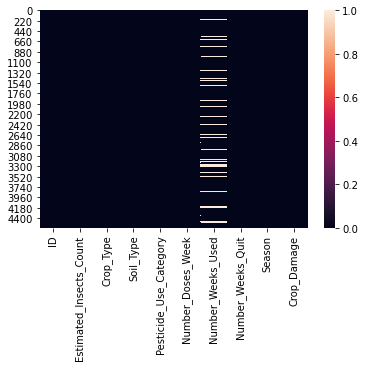

In [8]:
sns.heatmap(df.isnull())

    Observations:
        Column Number_Weeks_Used has missing values.

## Handling The NaN Values

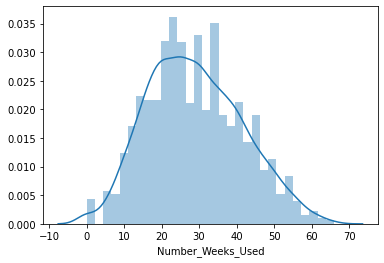

In [9]:
sns.distplot(df['Number_Weeks_Used'])
plt.show()

### Observations:
        Since data is somewhat 'normally distributed', we can fill the NaN values with 'Mean'.

In [10]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

## Dropping Columns

In [11]:
df.drop('ID',axis=1,inplace=True)

### Reason
        This column Contains Unique ID which is neither required for Crop_Damage Prediction nor required for any analysis, hence we can drop this column.

# EDA

## Univariate Analysis

In [12]:
# Target Column
df['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

### Observations:
        Gives us information about, crops outcome of the harvest season.
            0 - Alive (Healthy Crop)
            1 - Damaged due to other reasons
            2 - Damaged due to Pesticides            

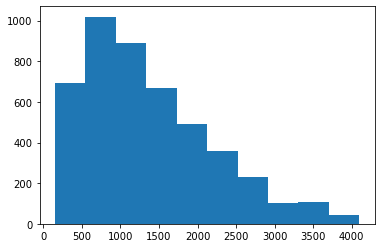

In [13]:
plt.hist(df['Estimated_Insects_Count'])
plt.show()

### Observations:
        - Crops estimated Insects count per square meter ranges from 250 to 4000.

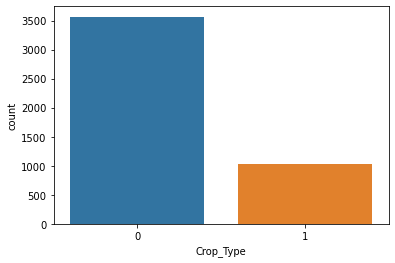

In [14]:
sns.countplot(df['Crop_Type'])
plt.show()

### Observations:
      Majority of crops belongs to 'Type 0' Crop Category.  

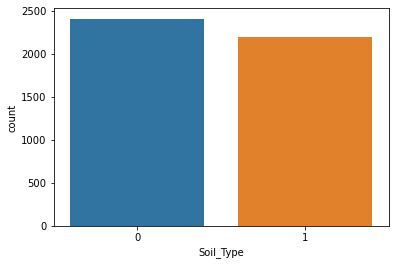

In [15]:
sns.countplot(df['Soil_Type'])
plt.show()

### Observations:
      Majority of crops are grown in 'Type 0' Soil Category.  

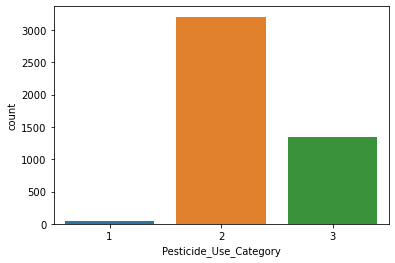

In [16]:
sns.countplot(df['Pesticide_Use_Category'])
plt.show()

### Observations:
      For majority of crops 'Previously Used' Pesticide has been applied again.

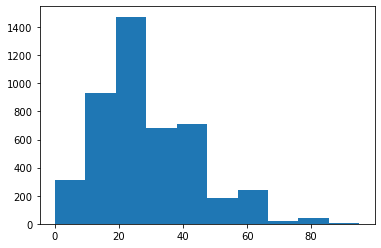

In [17]:
plt.hist(df['Number_Doses_Week'])
plt.show()

### Observations:
      Pesticide's Number of Dosage per week for crops varies from 0 t0 100. 

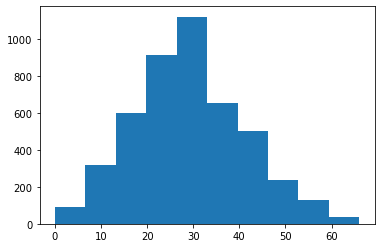

In [18]:
plt.hist(df['Number_Weeks_Used'])
plt.show()

### Observations:
      Number of weeks on which Pesticides have been applied on crops varies from 0 to 70. 

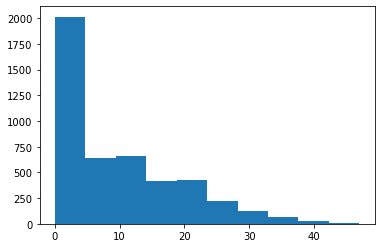

In [19]:
plt.hist(df['Number_Weeks_Quit'])
plt.show()

### Observations:
      Number of weeks on which Pesticides has not been applied on crops varies from 0 to 50. 

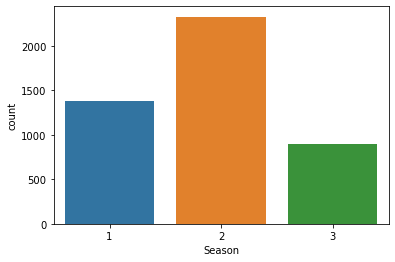

In [20]:
sns.countplot(df['Season'])
plt.show()

### Observations:
        Majority of crops are grown in Season 2.

## Bivariate Analysis

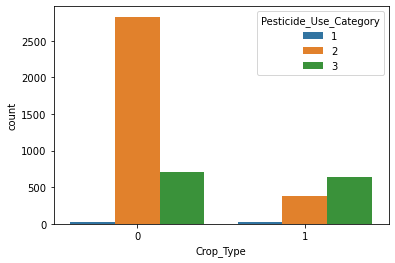

In [21]:
sns.countplot(df['Crop_Type'],hue=df['Pesticide_Use_Category'])
plt.show()

### Observations:
        - For 'Type-0' Crop Type, 'Previously used Pesticide' is applied more.
        - For 'Type-1' Crop Type, 'Currently using Pesticide' is applied more.

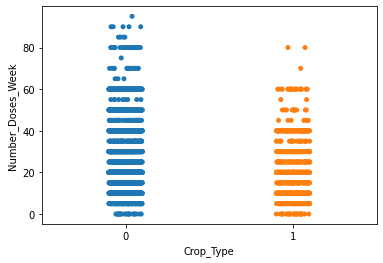

In [22]:
sns.stripplot(df['Crop_Type'],df['Number_Doses_Week'])
plt.show()

### Observations:
        - For 'Type-0' Crop Type, more number of pesticide doses per week is required.       

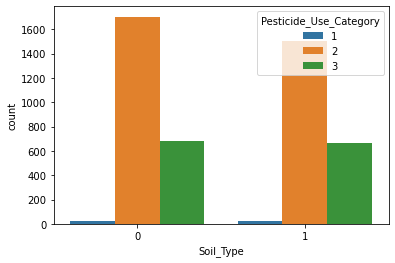

In [23]:
sns.countplot(df['Soil_Type'],hue=df['Pesticide_Use_Category'])
plt.show()

### Observations:
        On both Soil Types, 'Previously used pesticide' is applied more. 

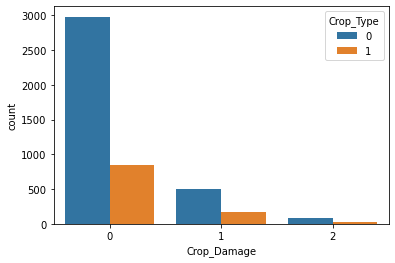

In [24]:
sns.countplot(df['Crop_Damage'],hue=df['Crop_Type'])
plt.show()

### Observations:
        In both 'Types of Crops' damage due to pesticides is less when compared to damage due to other reasons.

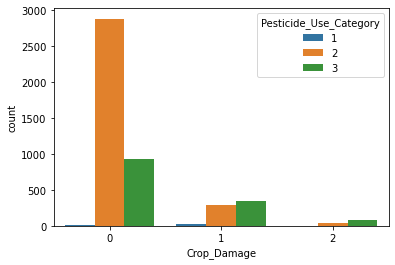

In [25]:
sns.countplot(df['Crop_Damage'],hue=df['Pesticide_Use_Category'])
plt.show()

### Observations:
        Crops damaged are more when 'currently used pesticide' are applied on crops when compared to 'previously used pesticide'.

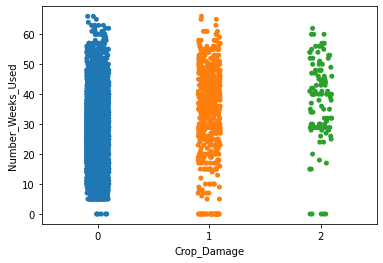

In [26]:
sns.stripplot(df['Crop_Damage'],df['Number_Weeks_Used'])
plt.show()

### Observations:
        If on more number of weeks pesticide is applied on crops then crops are more likely to get damaged due to pesticides.

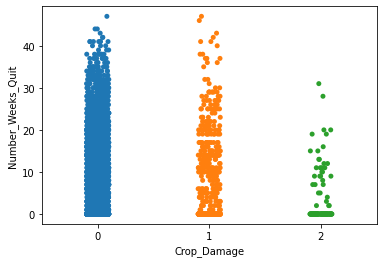

In [27]:
sns.stripplot(df['Crop_Damage'],df['Number_Weeks_Quit'])
plt.show()

### Observations:
        If number of weeks on which pesticide is not applied on crops is less then crops are more likely to get damaged due to pesticides.

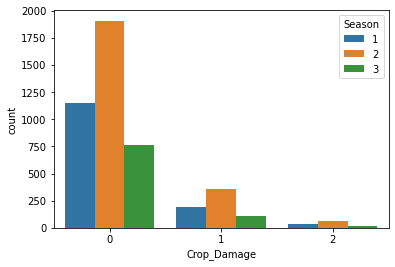

In [28]:
sns.countplot(df['Crop_Damage'],hue=df['Season'])
plt.show()

### Observations:
        Crops grown in Season 2 is more likely to get damaged due to pesticides when compared to other two seasons crops.

# Data Preprocessing

## Checking Outliers

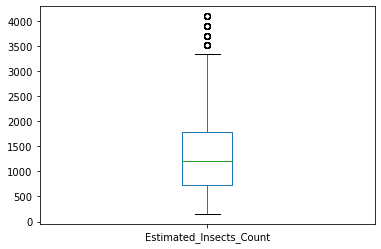

In [29]:
df['Estimated_Insects_Count'].plot.box()
plt.show()

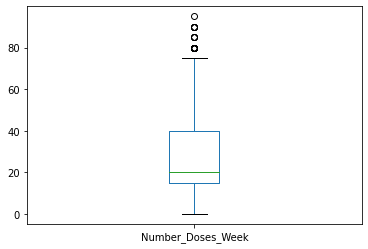

In [30]:
df['Number_Doses_Week'].plot.box()
plt.show()

### Observations:
        From above box plots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [31]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [32]:
np.where(z>3)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
         167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
         264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
         374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
         557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
         819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
        1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
        1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
        1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
        2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
        2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
        2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
        2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
        2814, 2828, 2829, 2834, 2841, 

In [33]:
# Threshold = 3
ad = df[(z<3).all(axis=1)]

In [34]:
print(df.shape, '\t' ,ad.shape)

(4599, 9) 	 (4370, 9)


In [35]:
# Percentage loss of data
per_loss=((4599-4370)/4599)*100
per_loss

4.979343335507719

### Since significant amount of data is not lost we can go ahead.

## Splitting Data

In [36]:
x=ad.drop('Crop_Damage',axis=1)
y=ad['Crop_Damage']

## Checking Skewness

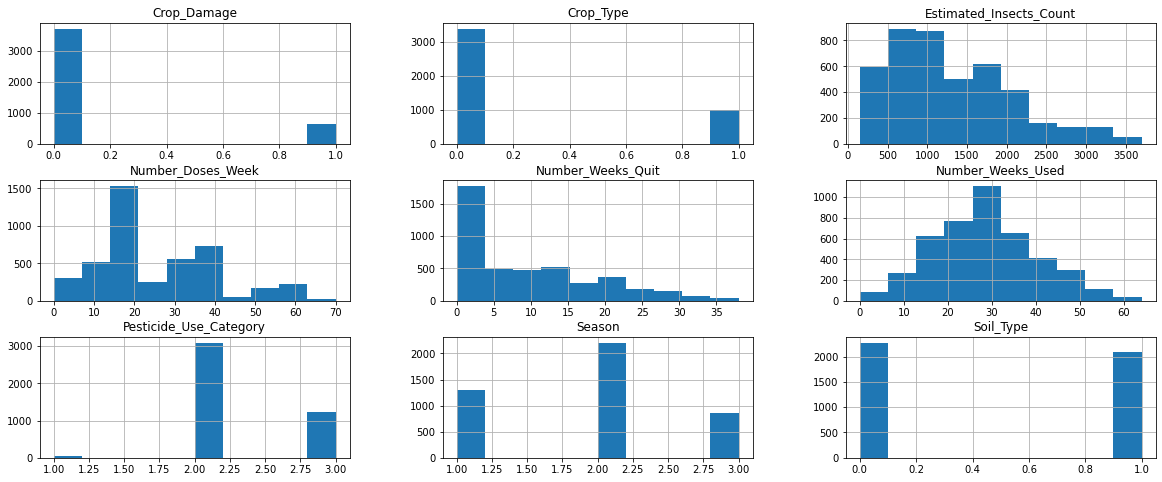

In [37]:
ad.hist(figsize=(20,8))
plt.show()

### Observations:
        From above plots it is evident that skewness exists.

## Removing Skewness

In [38]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [39]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# finding the best random_state

acc=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on random_state {best_random_state}")

 Best Accuracy score is 81.15942028985508 which is found on random_state 479


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_random_state)

In [43]:
# finding the best cv

cv=0
for i in range(2,20):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on cv = {best_cv}")

 Best Cross_val_score is 76.04118993135012 which is found on cv = 2


# Finding The Best Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
mod_list = [DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),SGDClassifier(),RandomForestClassifier()
           ,AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

In [46]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy Score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference b\w Accuracy score & Cross_val_score is:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('*****************************************************************************************')

DecisionTreeClassifier()
Accuracy Score: 80.09153318077803
Cross_val_score: 76.79633867276887
Difference b\w Accuracy score & Cross_val_score is: 3.2951945080091605
Training score: 0.998365478914678
[[995 137]
 [124  55]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1132
           1       0.29      0.31      0.30       179

    accuracy                           0.80      1311
   macro avg       0.59      0.59      0.59      1311
weighted avg       0.81      0.80      0.80      1311

*****************************************************************************************
KNeighborsClassifier()
Accuracy Score: 84.82074752097635
Cross_val_score: 84.14187643020595
Difference b\w Accuracy score & Cross_val_score is: 0.6788710907704001
Training score: 0.8754494932984636
[[1071   61]
 [ 138   41]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.91      1132
           1       0.40    

### Observations:
        From above it is evident that Support Vector Classifier(SVC) model is performing better.

### Let's perform hyper-parameter tuning on Support Vector Classifier(SVC) model.

In [47]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy Score:',mod_acc*100)
cv_score=cross_val_score(svc,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score & Cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',svc.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 87.10907704042715
Cross_val_score: 85.76659038901602
Difference b\w Accuracy score & Cross_val_score is: 1.3424866514111358
Training score: 0.8548545276234063
[[1131    1]
 [ 168   11]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1132
           1       0.92      0.06      0.12       179

    accuracy                           0.87      1311
   macro avg       0.89      0.53      0.52      1311
weighted avg       0.88      0.87      0.82      1311



## Hyper-parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale','auto'],
    'shrinking':[True,False],
    'probability':[True,False]
}

In [49]:
gscv=GridSearchCV(svc,parameters,scoring='accuracy',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [50]:
gscv.best_params_

{'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True}

In [51]:
svc=SVC(kernel='poly',gamma='scale',shrinking=True,probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy Score:',mod_acc*100)
cv_score=cross_val_score(svc,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score & Cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',svc.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 87.03279938977879
Cross_val_score: 85.81235697940504
Difference b\w Accuracy score & Cross_val_score is: 1.2204424103737495
Training score: 0.8551814318404708
[[1131    1]
 [ 169   10]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1132
           1       0.91      0.06      0.11       179

    accuracy                           0.87      1311
   macro avg       0.89      0.53      0.52      1311
weighted avg       0.88      0.87      0.82      1311



# Conclusion

In [52]:
df1 = pd.DataFrame({"Actual Crop_Damage":y_test,"Predicted Crop_Damage":y_pred})
df1

,Actual Crop_Damage,Predicted Crop_Damage
3232,0,0
4304,0,0
4413,0,0
1960,0,0
3947,0,0
...,...,...
3653,0,0
1592,0,0
1636,0,0
2839,1,0


### From above table it is clear that model is performing better with Accuracy of 86%-88% .

In [53]:
import joblib

In [54]:
# saving the best model for production
joblib.dump(svc,'Agriculture Model.obj')

['Agriculture Model.obj']

# Let's Consider Test Dataset

In [55]:
td

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [56]:
td.shape

(1199, 9)

In [57]:
td.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [58]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


    Observations:
        Column ID is in object data-type.
        Rest of the columns are in int and float data-type.

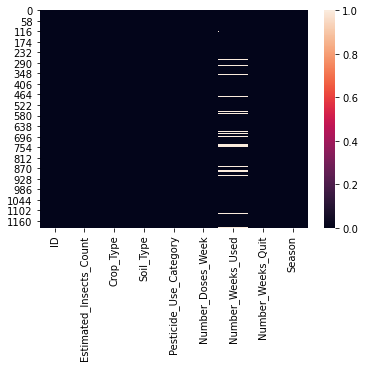

In [59]:
sns.heatmap(td.isnull())
plt.show()

    Observations:
        Column Number_Weeks_Used has missing values.

# Handling The NaN Values

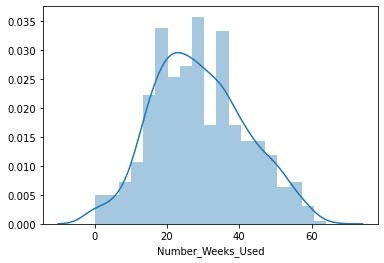

In [60]:
sns.distplot(td['Number_Weeks_Used'])
plt.show()

### Observations:
        Since data is somewhat 'normally distributed', we can fill the NaN values with 'Mean'.

In [61]:
td['Number_Weeks_Used'].fillna(td['Number_Weeks_Used'].mean(),inplace=True)

## Dropping Columns

In [62]:
td.drop('ID',axis=1,inplace=True)

### Reason
        This column Contains Unique ID which is neither required for Crop_Damage Prediction nor required for any analysis, hence we can drop this column.

# EDA

## Univariate Analysis

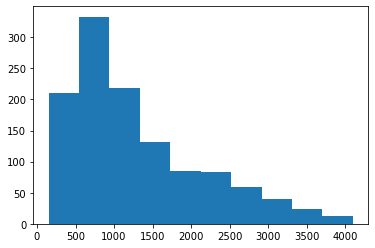

In [63]:
plt.hist(td['Estimated_Insects_Count'])
plt.show()

### Observations:
        - Crops estimated Insects count per square meter ranges from 250 to 4000.

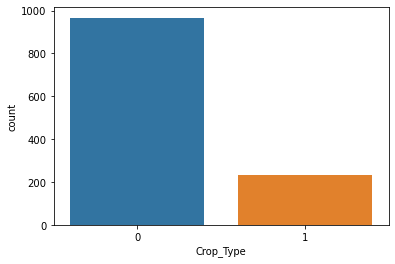

In [64]:
sns.countplot(td['Crop_Type'])
plt.show()

### Observations:
      Majority of crops belongs to 'Type 0' Crop Category.  

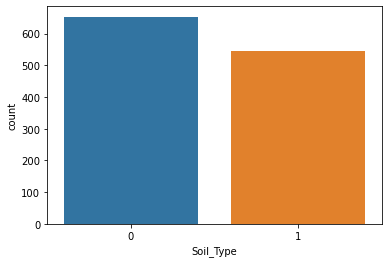

In [65]:
sns.countplot(td['Soil_Type'])
plt.show()

### Observations:
      Majority of crops are grown in 'Type 0' Soil Category.  

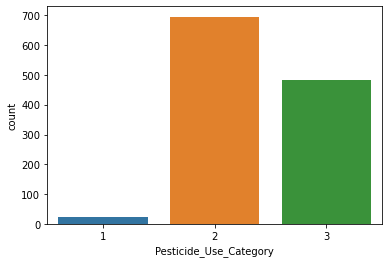

In [66]:
sns.countplot(td['Pesticide_Use_Category'])
plt.show()

### Observations:
      For majority of crops 'Previously Used' Pesticide has been applied again.

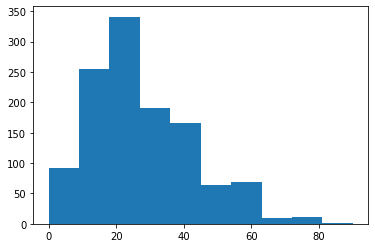

In [67]:
plt.hist(td['Number_Doses_Week'])
plt.show()

### Observations:
      Pesticide's Number of Dosage per week for crops varies from 0 t0 100. 

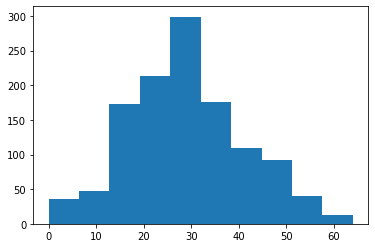

In [68]:
plt.hist(td['Number_Weeks_Used'])
plt.show()

### Observations:
      Number of weeks on which Pesticides have been applied on crops varies from 0 to 70. 

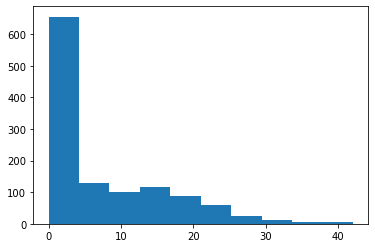

In [69]:
plt.hist(td['Number_Weeks_Quit'])
plt.show()

### Observations:
      Number of weeks on which Pesticides has not been applied on crops varies from 0 to 40. 

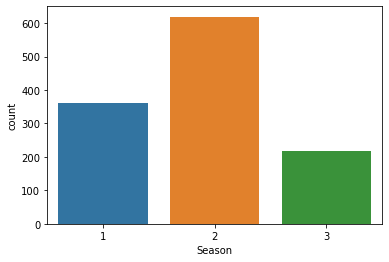

In [70]:
sns.countplot(td['Season'])
plt.show()

### Observations:
        Majority of crops are grown in Season 2.

## Bivariate Analysis

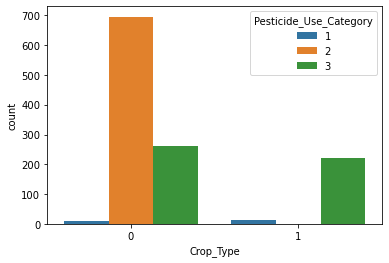

In [71]:
sns.countplot(td['Crop_Type'],hue=td['Pesticide_Use_Category'])
plt.show()

### Observations:
        - For 'Type-0' Crop Type, 'Previously used Pesticide' is applied more.
        - For 'Type-1' Crop Type, 'Currently using Pesticide' is applied more.

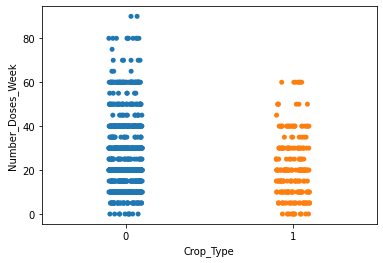

In [72]:
sns.stripplot(td['Crop_Type'],td['Number_Doses_Week'])
plt.show()

### Observations:
        - For 'Type-0' Crop Type, more number of pesticide doses per week is required.       

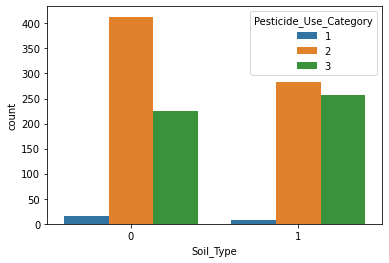

In [73]:
sns.countplot(td['Soil_Type'],hue=td['Pesticide_Use_Category'])
plt.show()

### Observations:
        On both Soil Types, 'Previously used pesticide' is applied more. 

# Data Preprocessing

## Checking Outliers

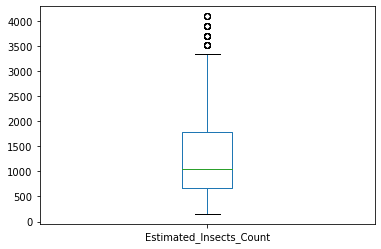

In [74]:
td['Estimated_Insects_Count'].plot.box()
plt.show()

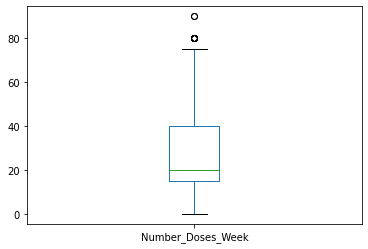

In [75]:
td['Number_Doses_Week'].plot.box()
plt.show()

### Observations:
        From above box plots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [76]:
z=np.abs(zscore(td))

In [77]:
np.where(z>3)

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
         503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
         870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
         913,  914,  915,  916, 1030, 1152], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int64))

In [78]:
# Threshold = 3
x2 = td[(z<3).all(axis=1)]

In [79]:
print(td.shape, '\t' ,x2.shape)

(1199, 8) 	 (1160, 8)


In [80]:
# Percentage loss of data
per_loss=((1199-1160)/1199)*100
per_loss

3.252710592160134

### Since significant amount of data is not lost we can go ahead.

## Checking Skewness

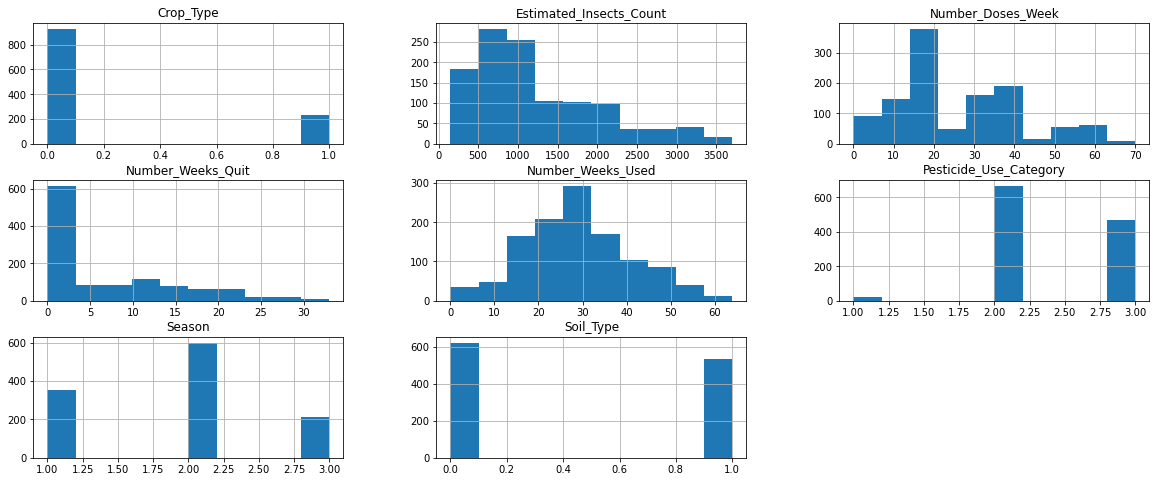

In [81]:
x2.hist(figsize=(20,8))
plt.show()

### Observations:
        From above plots it is evident that skewness exists.

## Removing Skewness

In [82]:
x2=power_transform(x2,method='yeo-johnson')

## Standardizing Data

In [83]:
x2=sc.fit_transform(x2)

## Load Model

In [84]:
svc2 = joblib.load('Agriculture Model.obj')

## Predict 'Crop_Damage'

In [85]:
outcome = svc2.predict(x2)

In [86]:
outcome

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
Result = pd.DataFrame({'Crop_Damage':outcome})
Result

,Crop_Damage
0,1
1,0
2,0
3,0
4,0
...,...
1155,0
1156,0
1157,0
1158,0


In [88]:
# saving the predicted 'Crop_Damage' in a csv file
Result.to_csv('Crop_Damage')